# Autoencoder v2

## Dependencies

In [0]:
# opencv
# used for downloading images
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

In [0]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

## Imports

In [0]:
from gc import collect

In [0]:
from google.colab.files import upload
from google.colab.files import download

In [0]:
from csv import reader
from csv import writer

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from numpy import frombuffer
from numpy import empty
from numpy import float32
from numpy import uint8
from numpy import save
from numpy import load
from numpy import amax
from numpy import floor
from numpy.random import shuffle
from numpy import arange

In [0]:
from io import BytesIO
from googleapiclient.http import MediaIoBaseDownload

In [0]:
from cv2 import imdecode

In [0]:
#from keras.models import load_model
from keras.layers import Input, Conv2D
from keras.models import Model
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint
from keras.utils import Sequence
from keras.backend import mean as keras_mean
from keras.backend import square as keras_square

Using TensorFlow backend.


## Check Memory

In [0]:
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

## Load File IDs

In [0]:
!ls

In [0]:
!ls | wc -l

1119


In [0]:
foo = upload()
foo = None

Saving ids_complete.csv to ids_complete.csv


In [0]:
# optionally rename file here
!mv ids_complete.csv ids.csv

In [0]:
color_id_list = []
label_id_list = []

with open('ids.csv', 'r', newline='') as csvfile:
  spamreader = reader(csvfile, delimiter=',')
  for row in spamreader:
    color_id_list.append(row[0])
    label_id_list.append(row[1])

In [0]:
color_id_list = color_id_list[80:]
label_id_list = label_id_list[80:]

In [0]:
c_ids, c_val_ids, l_ids, l_val_ids = train_test_split(color_id_list,
                                                      label_id_list,
                                                      test_size=0.1,
                                                      random_state=42)

In [0]:
collect()# garbage

0

In [0]:
num = len(c_ids)
vnum = len(c_val_ids)
print(num)
print(vnum)

1003
112


In [0]:
print(c_ids[:5])
print(l_ids[:5])
print(c_val_ids[:5])
print(l_val_ids[:5])

['13PWH6AMTewHXFaOePYpB5AwL2Yu9nwcl', '1-mQiHK5lFJkKldJlfgeXFkqV1Sma3v9T', '1Dg5KQoWuYcErUgMi4Ing50gW98qBqCvq', '1bGB9LqkiPGDetWeqnZl1eTXwaWixyQ-d', '11PHRCaaA5AoDeLHMOMg3DZTjuaA1bdh1']
['1G5dYDbZIPNNbDxlQTgs3r5FC0Ry-2U9S', '12K-hl9uaobG0IFEM1p5mu4uQ16WsSeUw', '18X1akn2GYHtcmZ4PV29oqmje0nQDUeu3', '1EavK4MCCm3XcX0EOcAJHp4AQaiZ8Cpqf', '1pCJyfl1Sh4SxW_tK0iAI_zxHg9Q9tcFW']
['10fU4wyQP8vPlGhbbv4b5ewVf2GVhd0Ti', '1GhaxkJq49RAdG8rwy85agnDPpSo0g1GS', '1abt28fTj4yIYhCuyGwEGq7sIPwnfASnk', '1UC5Psi9aKQhdM1-oHpr6vQU0lq8XyPvR', '1TcYURWVplhh8hzQaczIMG7W3IH3Tz5ER']
['1OlS8tWVf3AswpD4pCfLpdd43dkYCFwJO', '1rjVhN9G9FHI6-aH5W1Bz7Ahw8oWaCDZ6', '1Q6aRzD7YFS7UFZuguNKm4F70FBwCsocv', '1q5vI9l_ueRzKPO0MZPl9hhTCV0U2xVn4', '1Fjh-MQTcd514a0HoRi_2VBxjL0jH6fh1']


## Compile Model

In [0]:
def my_error(y_true, y_pred):
  # MSE * 100
  return keras_mean(keras_square(10 * (y_pred - y_true)), axis=-1)

In [0]:
input_img = Input(shape=(2710, 3384, 4))

x = Conv2D(4, (3, 3), activation='relu', padding='same',
          kernel_regularizer=l2(0.001))(input_img)
print(x._keras_shape)

x = Conv2D(4, (5, 5), activation='relu', padding='same',
          kernel_regularizer=l2(0.001))(x)
print(x._keras_shape)

x = Conv2D(4, (5, 5), activation='relu', padding='same',
          kernel_regularizer=l2(0.001))(x)
print(x._keras_shape)

x = Conv2D(3, (5, 5), activation='relu', padding='same',
          kernel_regularizer=l2(0.001), name='encoder')(x)
print(x._keras_shape)

###

x = Conv2D(4, (5, 5), activation='relu', padding='same',
          kernel_regularizer=l2(0.001))(x)
print(x._keras_shape)

x = Conv2D(4, (3, 3), activation='relu', padding='same',
          kernel_regularizer=l2(0.001))(x)
print(x._keras_shape)

x = Conv2D(4, (3, 3), activation='relu', padding='same',
          kernel_regularizer=l2(0.001))(x)
print(x._keras_shape)

x = Conv2D(4, (3, 3), activation='sigmoid', padding='same',
          kernel_regularizer=l2(0.001))(x)
print(x._keras_shape)

autoencoder = Model(input_img, x)
autoencoder.compile(optimizer='adadelta', loss=my_error, metrics=['accuracy'])

(None, 2710, 3384, 4)
(None, 2710, 3384, 4)
(None, 2710, 3384, 4)
(None, 2710, 3384, 3)
(None, 2710, 3384, 4)
(None, 2710, 3384, 4)
(None, 2710, 3384, 4)
(None, 2710, 3384, 4)


**Load pretrained weights.**

In [0]:
foo = upload()
foo = None

In [0]:
autoencoder.load_weights('weights.h5')

In [0]:
collect()# garbage

319

## Google Drive
Data can be downloaded from Google Drive using the REST API.

In [0]:
from google.colab import auth
auth.authenticate_user()

from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

In [0]:
def download_image(file_id):
  request = drive_service.files().get_media(fileId=file_id)
  downloaded = BytesIO()#io.BytesIO()
  downloader = MediaIoBaseDownload(downloaded, request)
  done = False
  while done is False:
    # _ is a placeholder for a progress object that we ignore.
    # (Our file is small, so we skip reporting progress.)
    _, done = downloader.next_chunk()

  downloaded.seek(0)

  foo = frombuffer(downloaded.getvalue(), dtype=uint8)
  drive_image = imdecode(foo, -1)
  return drive_image

## Train While Downloading Data

In [0]:
!mkdir weights

In [0]:
!ls weights

weights-01-7.48.h5  weights-02-2.80.h5	weights2-01-13.66.h5


In [0]:
#batch_size = 1
dimensions = (2710, 3384, 4)

class GDriveDataGenerator(Sequence):
  'Generates data for Keras'
  def __init__(self, list_IDs, label_IDs, fname):
    'Initialization'

    self.m_len = len(list_IDs)
    assert self.m_len == len(label_IDs)

    self.label_IDs = label_IDs
    self.list_IDs = list_IDs

    self.fname = fname

    self.X = empty((1, *dimensions))

  def __len__(self):
    'Denotes the number of batches per epoch'
    return self.m_len

  def __getitem__(self, index):
    'Generate one batch of data'

    mask = download_image(self.label_IDs[index])
    biggest = amax(mask)
    self.X[0, :, :, 3] = mask / biggest
    mask = None
    
    self.X[0, :, :, :3] = download_image(self.list_IDs[index]) / 255
    
    save(self.fname.format(index), self.X)

    collect()# garbage

    return self.X, self.X

In [0]:
checkpoint = ModelCheckpoint('weights/weights-{epoch:02d}-{val_loss:.2f}.h5',
                             save_weights_only=True)
callbacks_list = [checkpoint]

In [0]:
training_generator = GDriveDataGenerator(c_ids, l_ids, 'train{0}')
validation_generator = GDriveDataGenerator(c_val_ids, l_val_ids, 'val{0}')

history = autoencoder.fit_generator(generator=training_generator,
                                    validation_data=validation_generator,
                                    epochs=3,
                                    callbacks=callbacks_list,
                                    max_queue_size=1,
                                    initial_epoch=2)

Epoch 3/3
931/931 [==============================] - 3495s 4s/step - loss: 0.5173 - acc: 0.5620 - val_loss: 0.2773 - val_acc: 0.5498


**Below is a special case you can run when fit_generator crashes but saves a model**

In [0]:
validation_generator = GDriveDataGenerator(c_val_ids, l_val_ids, 'val{0}')
eval_obj = autoencoder.evaluate_generator(generator=validation_generator,
                                         max_queue_size=1)
print(eval_obj)

[7.476067900657654, 0.4093358591198921]


## Train From Local Files

In [0]:
batch_size = 4
dimensions = (2710, 3384, 4)

class DataGenerator(Sequence):
  'Generates data for Keras'
  def __init__(self, list_IDs, label_IDs, fname):
    'Initialization'

    self.m_len = len(list_IDs)
    assert self.m_len == len(label_IDs)
    self.m_len = self.m_len // batch_size

    self.label_IDs = label_IDs
    self.list_IDs = list_IDs

    self.fname = fname

    self.X = empty((batch_size, *dimensions))
    
    self.on_epoch_end()

  def __len__(self):
    'Denotes the number of batches per epoch'
    # floor(sample num / batch num)
    return self.m_len
  
  def __getitem__(self, index):
    'Generate one batch of data'

    start = index * batch_size
    for i in range (batch_size):
      self.X[i, :, :, :] = load(self.fname.format(self.indexes[i + start]))
    return self.X, self.X

  def on_epoch_end(self):
    'Updates indexes after each epoch'
    self.indexes = arange(len(self.list_IDs))
    shuffle(self.indexes)
    collect()
    print('EPOCH')

In [0]:
# clear any residue just to be safe
checkpoint = ModelCheckpoint('weights/weights-{epoch:02d}-{val_loss:.2f}.h5',
                             save_weights_only=True)
callbacks_list = [checkpoint]

In [0]:
collect()# garbage

0

In [0]:
training_generator = DataGenerator(c_ids, l_ids, 'train{0}.npy')
validation_generator = DataGenerator(c_val_ids, l_val_ids, 'val{0}.npy')

history = autoencoder.fit_generator(generator=training_generator,
                                    validation_data=validation_generator,
                                    epochs=2,
                                    initial_epoch=1
                                    callbacks=callbacks_list,
                                    max_queue_size=1)

In [0]:
!ls weights

In [0]:
!zip -r weights weights

In [0]:
download('weights.zip')

## Visualize

In [0]:
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
file_pat = 'val{0}.npy'
together = load(file_pat.format(100))
print(together.shape)

(1, 2710, 3384, 4)


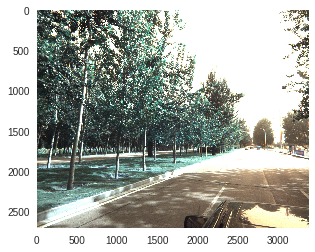

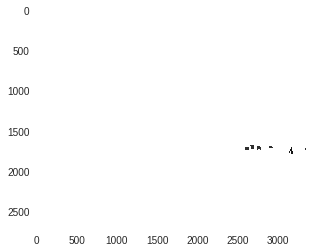

In [0]:
plt.grid(None)
plt.imshow(together[0, :, :, :3])
plt.show()
plt.imshow(together[0, :, :, 3])
plt.show()

In [0]:
prediction = autoencoder.predict(together[:, :, :, :4])
print(prediction.shape)

(1, 2710, 3384, 4)


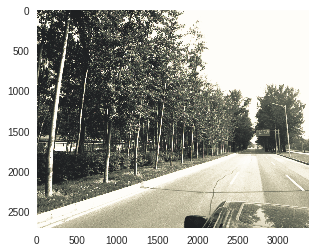

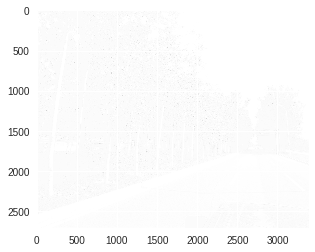

In [0]:
plt.grid(False)
plt.imshow(prediction[0, :, :, :3])
plt.show()
plt.imshow(prediction[0, :, :, 3])
plt.show()

In [0]:
intermediate_layer_model = Model(inputs=autoencoder.input,
                                 outputs=autoencoder.get_layer('encoder').output)
inter_out = intermediate_layer_model.predict(together)
print(inter_out.shape)

(1, 2710, 3384, 3)


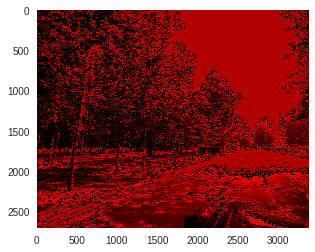

In [0]:
plt.grid(False)
plt.imshow(inter_out[0, :, :, :])
plt.show()